# Agent应用开发进阶

### 0.安装包

In [ ]:
!pip install langchain_experimental -i https://pypi.tuna.tsinghua.edu.cn/simple

## 1.基于Agent的数据智能化分析

In [1]:
from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent

### 读取文件

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv(r'cust_info.csv')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57790 entries, 0 to 57789
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cust_no  57790 non-null  object 
 1   I1       57790 non-null  object 
 2   I2       57790 non-null  int64  
 3   I3       57790 non-null  object 
 4   I4       57790 non-null  float64
 5   I5       57790 non-null  object 
 6   I6       57790 non-null  int64  
 7   I7       57790 non-null  int64  
 8   I8       57790 non-null  object 
 9   I10      57790 non-null  object 
 10  I11      57790 non-null  float64
 11  I12      57790 non-null  object 
 12  I13      57790 non-null  object 
 13  I14      57790 non-null  object 
 14  I15      57790 non-null  int64  
 15  I16      57790 non-null  float64
 16  I17      57790 non-null  int64  
 17  I18      57790 non-null  int64  
 18  I19      57790 non-null  int64  
 19  I20      57790 non-null  int64  
dtypes: float64(3), int64(8), object(9)
memory usage: 8

### 指定大模型

In [5]:
import os
os.environ["OPENAI_API_BASE"] = 'https://api.xty.app/v1'
os.environ["OPENAI_API_KEY"] = 'sk-9OiJkk755GLEpfNU41E93135B6634035B3F1A98e0dC1Cb60'

In [22]:
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(model="gpt-5.1")

In [23]:
from langchain_core.messages import HumanMessage, SystemMessage

messages = [
    SystemMessage(content="将以下内容翻译为英文"),
    HumanMessage(content="你好!"),
]

llm.invoke(messages)

AIMessage(content='Hello!', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 12, 'prompt_tokens': 19, 'total_tokens': 31, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-5.1', 'system_fingerprint': None, 'id': 'chatcmpl-ClcGb26rx4uBOHR4P6sjHnvoObIx9', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--2b00f988-9489-4e50-b61c-3f5f77c54581-0', usage_metadata={'input_tokens': 19, 'output_tokens': 12, 'total_tokens': 31, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [9]:
import os
os.environ["DEEPSEEK_API_BASE"] = 'https://api.deepseek.com/v1'
os.environ["DEEPSEEK_API_KEY"] = 'sk-c0307604dd4347e198be77645747cf49'

In [27]:
from langchain_deepseek import ChatDeepSeek

llm = ChatDeepSeek(
    model="deepseek-chat",
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,
)

### 指定Agent
**需要注意没有指定Tools，而是指定要分析的文件**

In [28]:
agent = create_pandas_dataframe_agent(
    llm, 
    df, 
    verbose=True,
    allow_dangerous_code=True,
    handle_parsing_errors=True)

C:\Users\SQL\anaconda3\Lib\site-packages\langchain_experimental\agents\agent_toolkits\pandas\base.py:283: UserWarning: Received additional kwargs {'handle_parsing_errors': True} which are no longer supported.
  warnings.warn(


In [29]:
agent.invoke("一共多少行数据？")



> Entering new AgentExecutor chain...
Thought: 我需要查看数据框的行数，可以使用 `df.shape` 或 `len(df)` 来获取。
Action: python_repl_ast
Action Input: df.shape(57790, 20)根据 `df.shape` 的结果，数据框的形状为 (57790, 20)，这意味着总共有 57790 行和 20 列。

Final Answer: 数据框中共有 57790 行数据。

> Finished chain.


{'input': '一共多少行数据？', 'output': '数据框中共有 57790 行数据。'}

In [30]:
agent.invoke("数据中性别分布是什么样的？")



> Entering new AgentExecutor chain...
Thought: 我需要查看数据中性别列（可能是I1）的分布情况。首先，我应该检查列名，然后计算性别的频次分布。

Action: python_repl_ast
Action Input: df['I1'].value_counts()I1
男性    43061
女性    14729
Name: count, dtype: int64

ValueError: An output parsing error occurred. In order to pass this error back to the agent and have it try again, pass `handle_parsing_errors=True` to the AgentExecutor. This is the error: Could not parse LLM output: `根据数据分析，数据中的性别分布如下：

- **男性**：43,061 人
- **女性**：14,729 人

男性客户数量明显多于女性客户，占总数据的大部分。`
For troubleshooting, visit: https://docs.langchain.com/oss/python/langchain/errors/OUTPUT_PARSING_FAILURE 

**如果报没有matplotlib或者seaborn等错误信息，那就通过pip命令安装对应的包即可**

In [31]:
agent.invoke("其中有没有缺失数据或者异常数据？")



> Entering new AgentExecutor chain...
Thought: 我需要先检查数据框的总体信息，包括缺失值和异常值。首先查看数据形状和列信息，然后检查每列的缺失值数量，最后查看数值列的统计摘要以发现可能的异常。

Action: python_repl_ast
Action Input: df.info()<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57790 entries, 0 to 57789
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cust_no  57790 non-null  object 
 1   I1       57790 non-null  object 
 2   I2       57790 non-null  int64  
 3   I3       57790 non-null  object 
 4   I4       57790 non-null  float64
 5   I5       57790 non-null  object 
 6   I6       57790 non-null  int64  
 7   I7       57790 non-null  int64  
 8   I8       57790 non-null  object 
 9   I10      57790 non-null  object 
 10  I11      57790 non-null  float64
 11  I12      57790 non-null  object 
 12  I13      57790 non-null  object 
 13  I14      57790 non-null  object 
 14  I15      57790 non-null  int64  
 15  I16      57790 non-null  float64
 16  I17      57790 non-null  int64  

ValueError: An output parsing error occurred. In order to pass this error back to the agent and have it try again, pass `handle_parsing_errors=True` to the AgentExecutor. This is the error: Could not parse LLM output: `根据我的分析，这个数据集的情况如下：

## 缺失数据情况：
**没有缺失数据** - 所有20列都有完整的57790个非空值。

## 异常数据情况：

### 1. **数值异常**：
- **I11列存在极端值**：99.9%的值都是0，但最大值达到16,176,000，与平均值4,287相差极大，这可能是数据录入错误或特殊异常值。

### 2. **数据质量问题**：
- **I7列全为0**：该特征没有变化，可能没有实际分析价值。
- **分类变量包含模糊值**：多个分类列（如I13婚姻状况、I14职业状态）包含"未知"、"未说明"、"其他"等值，这会影响分析的准确性。

### 3. **其他发现**：
- I4、I6、I15-I20等列基本都是0/1值，分布极不均衡（大部分为0）
- I2（年龄）范围18-66岁，分布正常
- 许多数值列的75%分位数都是0，说明数据高度偏斜

## 建议：
1. 对I11列进行异常值处理（如截断或转换）
2. 考虑删除或标记I7列（全为0）
3. 处理分类变量中的模糊类别
4. 对于高度偏斜的0/1变量，需要考虑不平衡数据的问题

**总结**：数据集没有缺失值，但存在异常值（特别是I11列）和数据质量问题。`
For troubleshooting, visit: https://docs.langchain.com/oss/python/langchain/errors/OUTPUT_PARSING_FAILURE 

In [32]:
agent.invoke("将其中年龄最小的10条数据输出")



> Entering new AgentExecutor chain...
Thought: 我需要找到年龄最小的10条数据。年龄列可能是'I2'，因为从表头看I2是数值型，且示例数据中I2的值像是年龄（25,36,24,22,24）。所以应该按I2升序排序，然后取前10条。

Action: python_repl_ast
Action Input: df_sorted = df.sort_values('I2').head(10); print(df_sorted)          cust_no  I1  I2    I3   I4                I5  I6  I7   I8     I10  \
17270  0xb2d97134  男性  18  普通客户  0.0            专业技术人员   1   0  金牛座  中等职业教育   
31891  0xb2d92b32  男性  19  普通客户  0.0            专业技术人员   1   0  摩羯座    专科教育   
48702  0xb2d21e15  男性  20  普通客户  0.0  生产、运输设备操作人员及有关人员   0   0  金牛座      未知   
21591  0xb2d82228  男性  21  普通客户  0.0  生产、运输设备操作人员及有关人员   0   0  双子座      未知   
16773  0xb2d87463  男性  21  普通客户  0.0            商业工作人员   0   0  双子座  中等职业教育   
1725   0xb2d83f7b  女性  21  普通客户  0.0       不便分类的其他从业人员   0   0  双子座      未知   
51868  0xb2d77cda  男性  21  普通客户  0.0       不便分类的其他从业人员   0   0  金牛座      未知   
33792  0xb2d81599  男性  21  普通客户  0.0       不便分类的其他从业人员   0   0  金牛座      未知   
33787  0xb2d7a1af  男性  21  普通客户  0.0       不便分类的其他

{'input': '将其中年龄最小的10条数据输出',
 'output': '年龄最小的10条数据已按I2（年龄）升序排列输出。最小年龄为18岁，具体数据如下：\n\n| 索引 | cust_no | I1 | I2 | I3 | I4 | I5 | I6 | I7 | I8 | I10 | I11 | I12 | I13 | I14 | I15 | I16 | I17 | I18 | I19 | I20 |\n|------|---------|----|----|----|----|----|----|----|----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|\n| 17270 | 0xb2d97134 | 男性 | 18 | 普通客户 | 0.0 | 专业技术人员 | 1 | 0 | 金牛座 | 中等职业教育 | 288000.0 | 个人 | 未婚 | 其他 | 0 | 0.0 | 1 | 1 | 1 | 1 |\n| 31891 | 0xb2d92b32 | 男性 | 19 | 普通客户 | 0.0 | 专业技术人员 | 1 | 0 | 摩羯座 | 专科教育 | 0.0 | 个人 | 未婚 | 一般员工 | 0 | 0.0 | 1 | 1 | 1 | 1 |\n| 48702 | 0xb2d21e15 | 男性 | 20 | 普通客户 | 0.0 | 生产、运输设备操作人员及有关人员 | 0 | 0 | 金牛座 | 未知 | 0.0 | 个人 | 未说明的婚姻状况 | 一般员工 | 0 | 0.0 | 0 | 0 | 1 | 0 |\n| 21591 | 0xb2d82228 | 男性 | 21 | 普通客户 | 0.0 | 生产、运输设备操作人员及有关人员 | 0 | 0 | 双子座 | 未知 | 0.0 | 个人 | 未说明的婚姻状况 | 一般员工 | 0 | 0.0 | 0 | 0 | 0 | 0 |\n| 16773 | 0xb2d87463 | 男性 | 21 | 普通客户 | 0.0 | 商业工作人员 | 0 | 0 | 双子座 | 中等职业教育 | 0.0 | 个人 | 未说明的婚姻状况 | 一般员工 | 0 | 0.0 | 0 | 0 | 0 



> Entering new AgentExecutor chain...
Thought: 用户想要绘制年龄、收入、性别的分布图。首先需要查看数据框的列名，确认年龄、收入、性别对应的列。从`df.head()`的输出中，可以看到"I1"可能是性别（男性/女性），"I2"可能是年龄（数值），"I4"可能是收入（数值）。需要进一步确认列的含义，并检查数据类型。然后，使用适当的绘图库（如matplotlib或seaborn）来绘制分布图。由于用户没有指定具体的绘图类型，我可以绘制直方图或箱线图等。我将先查看列名和数据类型，然后绘制分布图。

Action: python_repl_ast
Action Input: 
```python
print(df.columns)
```
Index(['cust_no', 'I1', 'I2', 'I3', 'I4', 'I5', 'I6', 'I7', 'I8', 'I10', 'I11',
       'I12', 'I13', 'I14', 'I15', 'I16', 'I17', 'I18', 'I19', 'I20'],
      dtype='object')
我需要查看列名和数据分布，然后绘制年龄、收入、性别的分布图。从列名来看，I1可能是性别，I2可能是年龄，I4可能是收入。让我先查看这些列的数据类型和基本统计信息。

Action: python_repl_ast
Action Input:
```python
# 查看相关列的数据类型和基本信息
print("数据类型:")
print(df[['I1', 'I2', 'I4']].dtypes)
print("\n基本统计信息:")
print(df[['I2', 'I4']].describe())
print("\n性别分布:")
print(df['I1'].value_counts())
print("\n年龄分布:")
print(df['I2'].value_counts().head(10))
print("\n收入分布:")
print(df['I4'].value_counts().head(10))
```
数据类型:
I1     object
I2      int64
I4    float64
dtype: object

<string>:16: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from current font.
<string>:16: UserWarning: Glyph 21035 (\N{CJK UNIFIED IDEOGRAPH-522B}) missing from current font.
<string>:16: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
<string>:16: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing from current font.
<string>:16: UserWarning: Glyph 30007 (\N{CJK UNIFIED IDEOGRAPH-7537}) missing from current font.
<string>:16: UserWarning: Glyph 22899 (\N{CJK UNIFIED IDEOGRAPH-5973}) missing from current font.
<string>:16: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from current font.
<string>:16: UserWarning: Glyph 40836 (\N{CJK UNIFIED IDEOGRAPH-9F84}) missing from current font.
<string>:16: UserWarning: Glyph 39057 (\N{CJK UNIFIED IDEOGRAPH-9891}) missing from current font.
<string>:16: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
<string>:16: UserWar

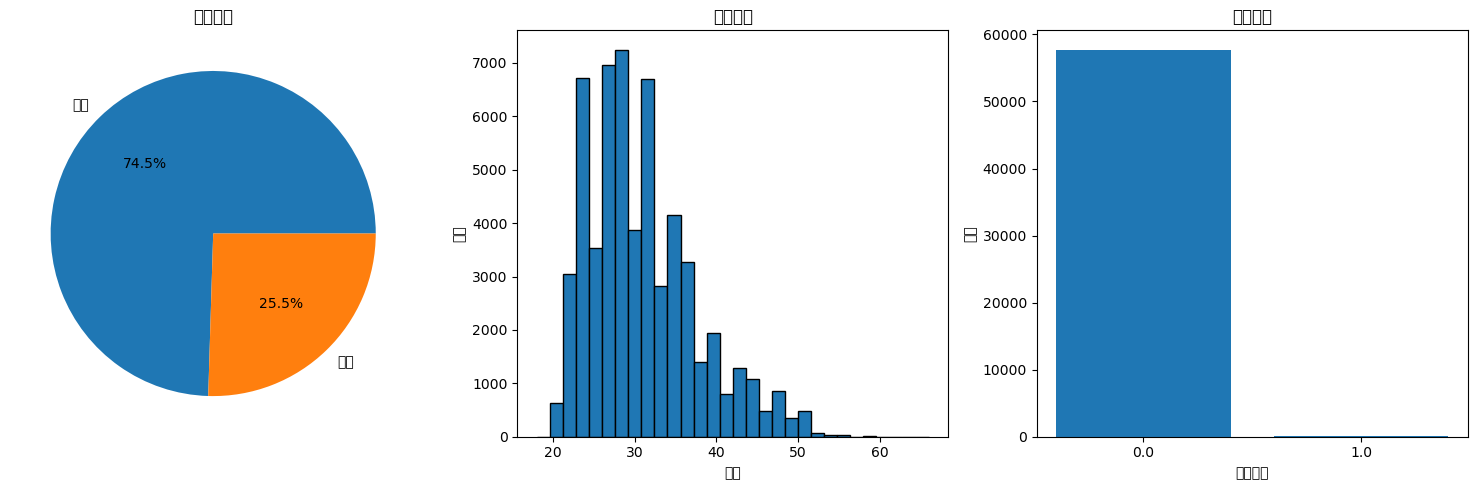

ValueError: An output parsing error occurred. In order to pass this error back to the agent and have it try again, pass `handle_parsing_errors=True` to the AgentExecutor. This is the error: Could not parse LLM output: `我已经成功绘制了年龄、收入和性别的分布图。从图中可以观察到以下信息：

1. **性别分布**：使用饼图展示了男性和女性的比例分布
2. **年龄分布**：使用直方图展示了年龄的分布情况，可以看出年龄的集中趋势和分布范围
3. **收入分布**：使用条形图展示了收入等级的分布，从数据探索结果看，收入主要集中在0和1两个等级，其中0等级占绝大多数

这些图表提供了对客户基本特征的直观了解：
- 性别比例分布
- 年龄的集中趋势和离散程度
- 收入等级的分布情况

如果需要更详细的分析或特定类型的图表（如箱线图、小提琴图等），我可以进一步调整绘图方式。`
For troubleshooting, visit: https://docs.langchain.com/oss/python/langchain/errors/OUTPUT_PARSING_FAILURE 

In [33]:
agent.invoke("绘制年龄、收入、性别的分布图")

### 在本地能够看到输出的xlsx文件

In [34]:
agent.invoke("筛选其中性别为女性的所有数据并将其输出为xlsx文件")



> Entering new AgentExecutor chain...
Thought: 我需要筛选出性别为女性的数据。从数据预览看，性别列是"I1"，值为"女性"。然后需要将筛选后的数据保存为xlsx文件。

Action: python_repl_ast
Action Input: 
```python
# 筛选性别为女性的数据
female_df = df[df['I1'] == '女性']
print(f"筛选出 {len(female_df)} 条女性数据")
print(female_df.head())
```
筛选出 14729 条女性数据
       cust_no  I1  I2    I3   I4           I5  I6  I7   I8   I10  I11 I12  \
1   0xb2d7967d  女性  36  普通客户  0.0    办事人员和有关人员   0   0  天秤座  专科教育  0.0  个人   
3   0xb2d7d242  女性  22  普通客户  0.0  不便分类的其他从业人员   0   0  天秤座    未知  0.0  个人   
4   0xb2d830ca  女性  24  普通客户  0.0       商业工作人员   0   0  金牛座  大学本科  0.0  个人   
15  0xb2d7a221  女性  31  普通客户  0.0  不便分类的其他从业人员   0   0  金牛座    未知  0.0  个人   
16  0xb2d83c6e  女性  26  普通客户  0.0  不便分类的其他从业人员   0   0  天秤座    未知  0.0  个人   

         I13   I14  I15  I16  I17  I18  I19  I20  
1   未说明的婚姻状况  一般员工    0  0.0    0    0    0    0  
3   未说明的婚姻状况    未知    0  0.0    0    0    0    0  
4   未说明的婚姻状况    其他    0  0.0    0    0    0    0  
15  未说明的婚姻状况    未知    0  0.0    0    0   

ValueError: An output parsing error occurred. In order to pass this error back to the agent and have it try again, pass `handle_parsing_errors=True` to the AgentExecutor. This is the error: Could not parse LLM output: `我已经成功筛选出性别为女性的数据并将其保存为Excel文件。

**操作步骤：**
1. 使用条件筛选 `df[df['I1'] == '女性']` 从原始数据中提取所有女性客户的数据
2. 将筛选后的数据保存为名为 `female_customers.xlsx` 的Excel文件

**结果：**
- 筛选出的女性客户数据已保存到当前目录下的 `female_customers.xlsx` 文件中
- 文件包含了所有I1列值为"女性"的行数据
- 保存时未包含行索引（index=False）

您可以在当前工作目录中找到这个Excel文件，用Excel或其他电子表格软件打开查看完整的女性客户数据。`
For troubleshooting, visit: https://docs.langchain.com/oss/python/langchain/errors/OUTPUT_PARSING_FAILURE 

## 2. Agent执行轨迹评估

In [35]:
from langchain_classic.evaluation.agents.trajectory_eval_chain import TrajectoryEvalChain

In [36]:
from langchain_classic.agents import create_react_agent,AgentExecutor

### 指定搜索引擎

In [37]:
from langchain_community.utilities import GoogleSerperAPIWrapper

In [38]:
from langchain_community.agent_toolkits.load_tools import load_tools
from langchain_community.agent_toolkits.load_tools import Tool

In [39]:
os.environ["SERPER_API_KEY"] = 'ba3353772a57554f232acff128ad9c4aa86f0aad'
search = GoogleSerperAPIWrapper()
tools_ser = [
    Tool(
        name="Intermediate Answer",
        func=search.run,
        description="useful for when you need to ask with search"
    )
]

In [40]:
from langchain_classic import hub
prompt = hub.pull("hwchase17/react")

In [41]:
print(prompt)

input_variables=['agent_scratchpad', 'input', 'tool_names', 'tools'] input_types={} partial_variables={} metadata={'lc_hub_owner': 'hwchase17', 'lc_hub_repo': 'react', 'lc_hub_commit_hash': 'd15fe3c426f1c4b3f37c9198853e4a86e20c425ca7f4752ec0c9b0e97ca7ea4d'} template='Answer the following questions as best you can. You have access to the following tools:\n\n{tools}\n\nUse the following format:\n\nQuestion: the input question you must answer\nThought: you should always think about what to do\nAction: the action to take, should be one of [{tool_names}]\nAction Input: the input to the action\nObservation: the result of the action\n... (this Thought/Action/Action Input/Observation can repeat N times)\nThought: I now know the final answer\nFinal Answer: the final answer to the original input question\n\nBegin!\n\nQuestion: {input}\nThought:{agent_scratchpad}'


### 定义Agent

In [42]:
agent_evl = create_react_agent(llm=llm,tools=tools_ser,prompt=prompt)

In [46]:
agentexecutor_evl= AgentExecutor.from_agent_and_tools(
    agent=agent_evl, 
    tools=tools_ser, 
    verbose=True, 
    return_intermediate_steps=True,
    handle_parsing_errors=True)

### 执行Agent

In [48]:
question = "罗振宇2025“时间的朋友”跨年演讲的主题是什么?"
response = agentexecutor_evl.invoke({"input": question})



> Entering new AgentExecutor chain...
我需要查找罗振宇2025年“时间的朋友”跨年演讲的主题信息。  

Action: Intermediate Answer  
Action Input: 罗振宇2025“时间的朋友”跨年演讲主题是什么？2024年12月31日，2025罗振宇“时间的朋友”跨年演讲在杭州奥体中心体育馆举办，主题为“来自未来的好消息”。罗振宇2025年“时间的朋友”跨年演讲的主题是 **“来自未来的好消息”**。Invalid Format: Missing 'Action:' after 'Thought:'Action: Intermediate Answer  
Action Input: 罗振宇2025“时间的朋友”跨年演讲主题是什么？  2024年12月31日，2025罗振宇“时间的朋友”跨年演讲在杭州奥体中心体育馆举办，主题为“来自未来的好消息”。罗振宇2025年“时间的朋友”跨年演讲的主题是 **“来自未来的好消息”**。Invalid Format: Missing 'Action:' after 'Thought:'Action: Intermediate Answer  
Action Input: 罗振宇2025“时间的朋友”跨年演讲主题是什么？  所以，《时间的朋友》跨年演讲今年的主题是：“来自未来的好消息。”如果你也是这种遇到困难决定不退赛再试试的人，那么今天晚上，我们就来看看，有哪些现在就可以结成搭档、一起创造的好消息。罗振宇2025年“时间的朋友”跨年演讲的主题是 **“来自未来的好消息”**。Invalid Format: Missing 'Action:' after 'Thought:'Action: Intermediate Answer  
Action Input: 罗振宇2025“时间的朋友”跨年演讲主题是什么？  2024年12月31日，2025罗振宇“时间的朋友”跨年演讲在杭州奥体中心体育馆举办，主题为“来自未来的好消息”。Final Answer: 罗振宇2025年“时间的朋友”跨年演讲的主题是 **“来自未来的好消息”**。

> Finished chain.


### 指定评估方式

In [49]:
eval_chain = TrajectoryEvalChain.from_llm(
    llm=llm, 
    agent_tools=tools_ser, 
    return_reasoning=True
)

### 进行评估

In [50]:
result = eval_chain.evaluate_agent_trajectory(
    input=question,
    agent_trajectory=response["intermediate_steps"],
    prediction=response["output"],
)

### 输出结果

In [51]:
print(result) 

{'score': 0.25, 'reasoning': "Let's evaluate step by step.\n\n**i. Is the final answer helpful?**  \nYes. The final answer directly and correctly states the theme as **“来自未来的好消息”** (Good News from the Future). It matches the information retrieved from the tool.\n\n**ii. Does the AI language use a logical sequence of tools to answer the question?**  \nNo. The sequence is repetitive and contains errors. The model repeatedly uses the same tool with the same input, and there are multiple `_Exception` steps due to formatting issues (missing `Action:` after `Thought:`). This indicates poor internal reasoning flow.\n\n**iii. Does the AI language model use the tools in a helpful way?**  \nPartially. The tool “Intermediate Answer” (which seems to function like a search/knowledge retrieval tool) is correctly used to get the answer. However, the model uses it multiple times unnecessarily after already obtaining the correct answer in Step 1, and it fails to handle the formatting errors properly.\n

In [52]:
print(result["score"]) 

0.25


## 3. RAG工具与Agent结合

### 导入需要的包

In [53]:
from langchain_core.tools import create_retriever_tool
from langchain_core.vectorstores import InMemoryVectorStore
from langchain_openai import ChatOpenAI, OpenAIEmbeddings
from langgraph.prebuilt import create_react_agent

### 创建向量存储

In [54]:
pet_vector_store = InMemoryVectorStore.from_texts(
    [
        "狗的体型大小、毛色因品种不同而不同，体格匀称；鼻吻部较长；眼呈卵圆形；两耳或竖或垂；四肢矫健，前肢5趾，后肢4趾，具爪，但爪不能伸缩；尾呈环形或镰刀形。",
        "猫体型小，体色由蓝灰色到棕黄色，体型瘦削，身长0.3-0.5米，全身毛被密而柔软，锁骨小，吻部短，眼睛圆，颈部粗壮，四肢较短，足下有数个球形肉垫；舌面被有角质层的丝状钩形乳突。",
    ],
    OpenAIEmbeddings(),
)

food_vector_store = InMemoryVectorStore.from_texts(
    [
        "胡萝卜，是伞形科胡萝卜属一年生或二年生草本植物。表面较光滑。 胡萝卜根肉质，长圆锥形，呈橙红色或黄色；茎单生，全株被白色粗硬毛；叶片长圆形，先端尖锐",
        "香蕉具有治疗热病烦渴、肺燥咳嗽、便秘、痔疮的药用价值。同时，香蕉为世界四大水果之一，产量高分布广、果肉营养丰富、香甜软糯，",
    ],
    OpenAIEmbeddings(),
)

### 构建Retrieve工具

In [55]:
tools = [
    create_retriever_tool(
        pet_vector_store.as_retriever(),
        "pet_information_retriever",
        "Fetches information about pets.",
    ),
    create_retriever_tool(
        food_vector_store.as_retriever(),
        "food_information_retriever",
        "Fetches information about food.",
    )
]

### 定义Agent

In [56]:
agent_graph = create_react_agent(llm, tools)

C:\Users\SQL\AppData\Local\Temp\ipykernel_18188\2593194984.py:1: LangGraphDeprecatedSinceV10: create_react_agent has been moved to `langchain.agents`. Please update your import to `from langchain.agents import create_agent`. Deprecated in LangGraph V1.0 to be removed in V2.0.
  agent_graph = create_react_agent(llm, tools)


### 执行Agent

In [57]:
for step in agent_graph.stream(
    {"messages": [("human", "告诉我关于猫的内容")]},
    stream_mode="values",
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

告诉我关于猫的内容
================================== Ai Message ==================================

我来帮您查找关于猫的信息。
Tool Calls:
  pet_information_retriever (call_00_39uMN4kU4CP15RHyNmLYUIfN)
 Call ID: call_00_39uMN4kU4CP15RHyNmLYUIfN
  Args:
    query: 猫
================================= Tool Message =================================
Name: pet_information_retriever

猫体型小，体色由蓝灰色到棕黄色，体型瘦削，身长0.3-0.5米，全身毛被密而柔软，锁骨小，吻部短，眼睛圆，颈部粗壮，四肢较短，足下有数个球形肉垫；舌面被有角质层的丝状钩形乳突。

狗的体型大小、毛色因品种不同而不同，体格匀称；鼻吻部较长；眼呈卵圆形；两耳或竖或垂；四肢矫健，前肢5趾，后肢4趾，具爪，但爪不能伸缩；尾呈环形或镰刀形。
================================== Ai Message ==================================

根据查询结果，以下是关于猫的基本信息：

**猫的生理特征：**
- 体型较小，身长约0.3-0.5米
- 体色多样，从蓝灰色到棕黄色
- 体型瘦削，全身毛被密而柔软
- 锁骨小，吻部短，眼睛圆
- 颈部粗壮，四肢较短
- 足下有数个球形肉垫，有助于缓冲和无声行走
- 舌面有角质层的丝状钩形乳突，有助于梳理毛发和清洁

**与狗的对比：**
- 狗的体型大小和毛色因品种而异
- 狗的鼻吻部较长，猫的吻部较短
- 狗的眼睛呈卵圆形，猫的眼睛较圆
- 狗的耳朵或竖或垂，猫的耳朵通常直立
- 狗的四肢矫健，前肢5趾，后肢4趾，爪子不能伸缩
- 猫的爪子可以伸缩，这是猫科动物的特征之一
- 狗的尾巴呈环形或镰刀形

猫是